# Artigo modelo:

Cogill, S., & Wang, L. (2016). Support vector machine model of developmental brain gene expression data for prioritization of Autism risk gene candidates. Bioinformatics, 32(23), 3611–3618. https://doi.org/10.1093/bioinformatics/btw498

<img src="sequenciamento.png" />

# Data Analysis

In [2]:
#!pip install -U imbalanced-learn

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore", category=FutureWarning)

In [19]:
data = pd.read_excel('baseASD.xlsx')

Before making anything like feature selection, feature extraction and classification, we start with basic data analysis. 
Lets look at features of data.

In [20]:
display(data)  # head method shows only first 5 rows

,Gene,Ensembl ID,Ocx_8pcw_M_13058,M1C_S1C_8pcw_M_13058,AMY_8pcw_M_13058,MGE_8pcw_M_13058,STC_8pcw_M_13058,URL_8pcw_M_13058,CGE_8pcw_M_13058,DTH_8pcw_M_13058,...,CBC_40yrs_F_12304,V1C_40yrs_F_12304,OFC_40yrs_F_12304,STC_40yrs_F_12304,IPC_40yrs_F_12304,M1C_40yrs_F_12304,HIP_40yrs_F_12304,STR_40yrs_F_12304,S1C_40yrs_F_12304,Gene Type
0,ABAT,ENSG00000183044,4.93,5.15,5.43,6.00,4.83,5.59,5.49,5.23,...,4.81,6.02,6.16,6.15,6.18,5.28,5.06,6.30,5.71,ASD
1,ACSL4,ENSG00000068366,2.86,2.87,3.93,3.23,3.54,3.84,2.84,4.15,...,2.95,3.41,4.55,4.22,4.49,2.90,4.17,3.30,3.56,ASD
2,ADA,ENSG00000196839,1.46,0.95,1.19,1.46,1.25,0.78,1.16,0.73,...,0.44,0.88,0.41,0.44,0.52,0.69,1.02,1.33,0.77,ASD
3,ADK,ENSG00000156110,3.81,3.32,2.95,3.49,3.12,2.56,3.44,2.87,...,2.71,2.90,2.93,2.93,3.13,3.34,3.41,3.30,3.38,ASD
4,ADNP,ENSG00000101126,5.04,5.49,5.31,5.32,5.47,5.20,5.40,5.03,...,3.31,3.56,3.65,3.59,3.73,2.82,3.30,3.15,2.96,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,ZNF148,ENSG00000163848,3.88,3.67,3.44,3.45,3.63,2.80,3.49,3.25,...,1.86,2.21,2.69,2.47,2.73,1.36,2.05,2.18,1.77,Disease
2124,ZNF365,ENSG00000138311,0.26,0.26,0.65,0.25,0.65,0.55,0.18,0.14,...,2.21,5.36,5.17,5.27,5.46,4.29,3.69,3.79,4.91,Disease
2125,ZNF469,ENSG00000225614,0.12,0.26,0.09,0.15,0.29,0.40,0.08,0.06,...,0.02,0.25,0.39,0.44,0.34,0.17,0.20,0.46,0.32,Disease
2126,ZNF513,ENSG00000163795,2.63,3.04,3.01,2.54,3.02,4.21,2.85,3.13,...,2.97,2.77,2.44,2.57,2.22,2.54,2.18,2.36,2.65,Disease


# Vamos fazer uma cópia do Dataframe

In [21]:
df = data.copy()

In [22]:
df.head()

,Gene,Ensembl ID,Ocx_8pcw_M_13058,M1C_S1C_8pcw_M_13058,AMY_8pcw_M_13058,MGE_8pcw_M_13058,STC_8pcw_M_13058,URL_8pcw_M_13058,CGE_8pcw_M_13058,DTH_8pcw_M_13058,...,CBC_40yrs_F_12304,V1C_40yrs_F_12304,OFC_40yrs_F_12304,STC_40yrs_F_12304,IPC_40yrs_F_12304,M1C_40yrs_F_12304,HIP_40yrs_F_12304,STR_40yrs_F_12304,S1C_40yrs_F_12304,Gene Type
0,ABAT,ENSG00000183044,4.93,5.15,5.43,6.00,4.83,5.59,5.49,5.23,...,4.81,6.02,6.16,6.15,6.18,5.28,5.06,6.30,5.71,ASD
1,ACSL4,ENSG00000068366,2.86,2.87,3.93,3.23,3.54,3.84,2.84,4.15,...,2.95,3.41,4.55,4.22,4.49,2.90,4.17,3.30,3.56,ASD
2,ADA,ENSG00000196839,1.46,0.95,1.19,1.46,1.25,0.78,1.16,0.73,...,0.44,0.88,0.41,0.44,0.52,0.69,1.02,1.33,0.77,ASD
3,ADK,ENSG00000156110,3.81,3.32,2.95,3.49,3.12,2.56,3.44,2.87,...,2.71,2.90,2.93,2.93,3.13,3.34,3.41,3.30,3.38,ASD
4,ADNP,ENSG00000101126,5.04,5.49,5.31,5.32,5.47,5.20,5.40,5.03,...,3.31,3.56,3.65,3.59,3.73,2.82,3.30,3.15,2.96,ASD


# Vamos converter a classe para número

In [23]:
#Mas antes vamos ver a distribuição
df['Gene Type'].value_counts()

Disease    1762
ASD         366
Name: Gene Type, dtype: int64

In [24]:
dicionario = {'Disease':0, 'ASD':1}
df['Gene Type'] = df['Gene Type'].map(dicionario) 

In [25]:
df.head()

,Gene,Ensembl ID,Ocx_8pcw_M_13058,M1C_S1C_8pcw_M_13058,AMY_8pcw_M_13058,MGE_8pcw_M_13058,STC_8pcw_M_13058,URL_8pcw_M_13058,CGE_8pcw_M_13058,DTH_8pcw_M_13058,...,CBC_40yrs_F_12304,V1C_40yrs_F_12304,OFC_40yrs_F_12304,STC_40yrs_F_12304,IPC_40yrs_F_12304,M1C_40yrs_F_12304,HIP_40yrs_F_12304,STR_40yrs_F_12304,S1C_40yrs_F_12304,Gene Type
0,ABAT,ENSG00000183044,4.93,5.15,5.43,6.00,4.83,5.59,5.49,5.23,...,4.81,6.02,6.16,6.15,6.18,5.28,5.06,6.30,5.71,1
1,ACSL4,ENSG00000068366,2.86,2.87,3.93,3.23,3.54,3.84,2.84,4.15,...,2.95,3.41,4.55,4.22,4.49,2.90,4.17,3.30,3.56,1
2,ADA,ENSG00000196839,1.46,0.95,1.19,1.46,1.25,0.78,1.16,0.73,...,0.44,0.88,0.41,0.44,0.52,0.69,1.02,1.33,0.77,1
3,ADK,ENSG00000156110,3.81,3.32,2.95,3.49,3.12,2.56,3.44,2.87,...,2.71,2.90,2.93,2.93,3.13,3.34,3.41,3.30,3.38,1
4,ADNP,ENSG00000101126,5.04,5.49,5.31,5.32,5.47,5.20,5.40,5.03,...,3.31,3.56,3.65,3.59,3.73,2.82,3.30,3.15,2.96,1


In [26]:
#Remover os espaços
df.columns = df.columns.str.replace(' ', '') 

In [27]:
df.head()

,Gene,EnsemblID,Ocx_8pcw_M_13058,M1C_S1C_8pcw_M_13058,AMY_8pcw_M_13058,MGE_8pcw_M_13058,STC_8pcw_M_13058,URL_8pcw_M_13058,CGE_8pcw_M_13058,DTH_8pcw_M_13058,...,CBC_40yrs_F_12304,V1C_40yrs_F_12304,OFC_40yrs_F_12304,STC_40yrs_F_12304,IPC_40yrs_F_12304,M1C_40yrs_F_12304,HIP_40yrs_F_12304,STR_40yrs_F_12304,S1C_40yrs_F_12304,GeneType
0,ABAT,ENSG00000183044,4.93,5.15,5.43,6.00,4.83,5.59,5.49,5.23,...,4.81,6.02,6.16,6.15,6.18,5.28,5.06,6.30,5.71,1
1,ACSL4,ENSG00000068366,2.86,2.87,3.93,3.23,3.54,3.84,2.84,4.15,...,2.95,3.41,4.55,4.22,4.49,2.90,4.17,3.30,3.56,1
2,ADA,ENSG00000196839,1.46,0.95,1.19,1.46,1.25,0.78,1.16,0.73,...,0.44,0.88,0.41,0.44,0.52,0.69,1.02,1.33,0.77,1
3,ADK,ENSG00000156110,3.81,3.32,2.95,3.49,3.12,2.56,3.44,2.87,...,2.71,2.90,2.93,2.93,3.13,3.34,3.41,3.30,3.38,1
4,ADNP,ENSG00000101126,5.04,5.49,5.31,5.32,5.47,5.20,5.40,5.03,...,3.31,3.56,3.65,3.59,3.73,2.82,3.30,3.15,2.96,1


## Remoção de atributos irrelevantes

In [28]:
col = df.columns      
print(col)

Index(['Gene', 'EnsemblID', 'Ocx_8pcw_M_13058', 'M1C_S1C_8pcw_M_13058',
       'AMY_8pcw_M_13058', 'MGE_8pcw_M_13058', 'STC_8pcw_M_13058',
       'URL_8pcw_M_13058', 'CGE_8pcw_M_13058', 'DTH_8pcw_M_13058',
       ...
       'CBC_40yrs_F_12304', 'V1C_40yrs_F_12304', 'OFC_40yrs_F_12304',
       'STC_40yrs_F_12304', 'IPC_40yrs_F_12304', 'M1C_40yrs_F_12304',
       'HIP_40yrs_F_12304', 'STR_40yrs_F_12304', 'S1C_40yrs_F_12304',
       'GeneType'],
      dtype='object', length=527)


In [29]:
df = df.drop(['Gene','EnsemblID'],axis = 1)

In [30]:
df.head()

,Ocx_8pcw_M_13058,M1C_S1C_8pcw_M_13058,AMY_8pcw_M_13058,MGE_8pcw_M_13058,STC_8pcw_M_13058,URL_8pcw_M_13058,CGE_8pcw_M_13058,DTH_8pcw_M_13058,MFC_8pcw_M_13058,DFC_8pcw_M_13058,...,CBC_40yrs_F_12304,V1C_40yrs_F_12304,OFC_40yrs_F_12304,STC_40yrs_F_12304,IPC_40yrs_F_12304,M1C_40yrs_F_12304,HIP_40yrs_F_12304,STR_40yrs_F_12304,S1C_40yrs_F_12304,GeneType
0,4.93,5.15,5.43,6.00,4.83,5.59,5.49,5.23,4.65,4.59,...,4.81,6.02,6.16,6.15,6.18,5.28,5.06,6.30,5.71,1
1,2.86,2.87,3.93,3.23,3.54,3.84,2.84,4.15,2.91,3.11,...,2.95,3.41,4.55,4.22,4.49,2.90,4.17,3.30,3.56,1
2,1.46,0.95,1.19,1.46,1.25,0.78,1.16,0.73,1.38,1.57,...,0.44,0.88,0.41,0.44,0.52,0.69,1.02,1.33,0.77,1
3,3.81,3.32,2.95,3.49,3.12,2.56,3.44,2.87,3.71,3.92,...,2.71,2.90,2.93,2.93,3.13,3.34,3.41,3.30,3.38,1
4,5.04,5.49,5.31,5.32,5.47,5.20,5.40,5.03,4.85,4.49,...,3.31,3.56,3.65,3.59,3.73,2.82,3.30,3.15,2.96,1


In [31]:
#Mas antes vamos ver a distribuição
df['GeneType'].value_counts()

0    1762
1     366
Name: GeneType, dtype: int64

# Balancemaneto das classes

In [32]:
#Downsampling da maioria - diminuir a classe majoritária
from sklearn.utils import resample
mask = df.GeneType == 1
surv_df = df[mask]
death_df = df[~mask]
df_downsample = resample(death_df,replace=False,n_samples=len(surv_df),random_state=42,)
df = pd.concat([surv_df, df_downsample])

In [33]:
df['GeneType'].value_counts()

0    366
1    366
Name: GeneType, dtype: int64

In [34]:
X = df.drop(['GeneType'],axis = 1)
y = df['GeneType']  

### Verifica se há dados faltantes

In [35]:
#check if there is a NaN value in our data frame x, a False indicates there are no missing values
X.isnull().values.any()

False

In [36]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: GeneType, dtype: int64

In [37]:
X

,Ocx_8pcw_M_13058,M1C_S1C_8pcw_M_13058,AMY_8pcw_M_13058,MGE_8pcw_M_13058,STC_8pcw_M_13058,URL_8pcw_M_13058,CGE_8pcw_M_13058,DTH_8pcw_M_13058,MFC_8pcw_M_13058,DFC_8pcw_M_13058,...,A1C_40yrs_F_12304,CBC_40yrs_F_12304,V1C_40yrs_F_12304,OFC_40yrs_F_12304,STC_40yrs_F_12304,IPC_40yrs_F_12304,M1C_40yrs_F_12304,HIP_40yrs_F_12304,STR_40yrs_F_12304,S1C_40yrs_F_12304
0,4.93,5.15,5.43,6.00,4.83,5.59,5.49,5.23,4.65,4.59,...,5.56,4.81,6.02,6.16,6.15,6.18,5.28,5.06,6.30,5.71
1,2.86,2.87,3.93,3.23,3.54,3.84,2.84,4.15,2.91,3.11,...,2.72,2.95,3.41,4.55,4.22,4.49,2.90,4.17,3.30,3.56
2,1.46,0.95,1.19,1.46,1.25,0.78,1.16,0.73,1.38,1.57,...,0.71,0.44,0.88,0.41,0.44,0.52,0.69,1.02,1.33,0.77
3,3.81,3.32,2.95,3.49,3.12,2.56,3.44,2.87,3.71,3.92,...,3.07,2.71,2.90,2.93,2.93,3.13,3.34,3.41,3.30,3.38
4,5.04,5.49,5.31,5.32,5.47,5.20,5.40,5.03,4.85,4.49,...,3.10,3.31,3.56,3.65,3.59,3.73,2.82,3.30,3.15,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,0.41,0.37,0.59,0.40,0.53,0.73,0.33,0.31,0.42,0.47,...,0.92,0.97,0.73,0.29,0.43,0.24,0.58,0.72,1.37,0.74
1511,2.64,2.10,1.85,2.20,2.44,1.97,2.15,1.63,2.40,2.51,...,0.88,1.36,0.83,0.45,0.52,0.45,0.96,0.81,1.19,1.08
1388,2.79,2.69,1.90,2.56,1.96,1.19,2.55,1.68,2.77,2.47,...,0.82,0.56,0.93,1.05,1.25,1.19,0.46,1.26,1.49,0.73
1478,2.21,2.90,2.58,1.98,2.85,3.33,2.06,2.26,1.96,1.94,...,2.43,3.49,2.91,2.50,2.85,2.58,2.28,1.64,2.54,2.42


## Distruição das amostras entre as classes - Gráfica

Disease:  366
ASD :  366


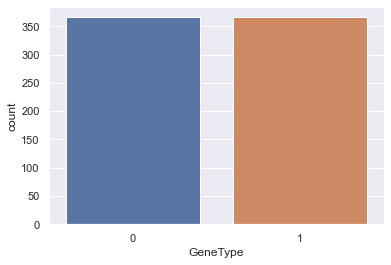

In [42]:
sns.set(style="darkgrid")
ax = sns.countplot(x = y)       # M = 212, B = 357
N, S = y.value_counts(sort=True) #sort=True (default) in order to be sure B, M are in the right order (alphabetical)
print('Disease: ',N)
print('ASD : ',S)

Let's now use the describe function in order to look at our features :

## Normalização dos dados

In [43]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
data_normal = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [44]:
data_normal

,Ocx_8pcw_M_13058,M1C_S1C_8pcw_M_13058,AMY_8pcw_M_13058,MGE_8pcw_M_13058,STC_8pcw_M_13058,URL_8pcw_M_13058,CGE_8pcw_M_13058,DTH_8pcw_M_13058,MFC_8pcw_M_13058,DFC_8pcw_M_13058,...,A1C_40yrs_F_12304,CBC_40yrs_F_12304,V1C_40yrs_F_12304,OFC_40yrs_F_12304,STC_40yrs_F_12304,IPC_40yrs_F_12304,M1C_40yrs_F_12304,HIP_40yrs_F_12304,STR_40yrs_F_12304,S1C_40yrs_F_12304
0,0.471319,0.502439,0.483096,0.552995,0.453947,0.519034,0.519395,0.448158,0.447977,0.425394,...,0.584034,0.582324,0.619342,0.664509,0.634675,0.641079,0.532258,0.491262,0.665259,0.581466
1,0.273423,0.280000,0.349644,0.297696,0.332707,0.356546,0.268685,0.355613,0.280347,0.288230,...,0.285714,0.357143,0.350823,0.490831,0.435501,0.465768,0.292339,0.404854,0.348469,0.362525
2,0.139579,0.092683,0.105872,0.134562,0.117481,0.072423,0.109745,0.062554,0.132948,0.145505,...,0.074580,0.053269,0.090535,0.044229,0.045408,0.053942,0.069556,0.099029,0.140444,0.078411
3,0.364245,0.323902,0.262456,0.321659,0.293233,0.237697,0.325449,0.245930,0.357418,0.363299,...,0.322479,0.328087,0.298354,0.316073,0.302374,0.324689,0.336694,0.331068,0.348469,0.344196
4,0.481836,0.535610,0.472420,0.490323,0.514098,0.482823,0.510880,0.431020,0.467245,0.416126,...,0.325630,0.400726,0.366255,0.393743,0.370485,0.386929,0.284274,0.320388,0.332629,0.301426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,0.039197,0.036098,0.052491,0.036866,0.049812,0.067781,0.031220,0.026564,0.040462,0.043559,...,0.096639,0.117433,0.075103,0.031284,0.044376,0.024896,0.058468,0.069903,0.144667,0.075356
728,0.252390,0.204878,0.164591,0.202765,0.229323,0.182916,0.203406,0.139674,0.231214,0.232623,...,0.092437,0.164649,0.085391,0.048544,0.053664,0.046680,0.096774,0.078641,0.125660,0.109980
729,0.266730,0.262439,0.169039,0.235945,0.184211,0.110492,0.241249,0.143959,0.266859,0.228916,...,0.086134,0.067797,0.095679,0.113269,0.128999,0.123444,0.046371,0.122330,0.157339,0.074338
730,0.211281,0.282927,0.229537,0.182488,0.267857,0.309192,0.194891,0.193659,0.188825,0.179796,...,0.255252,0.422518,0.299383,0.269687,0.294118,0.267635,0.229839,0.159223,0.268215,0.246436


# Executando o SVC

Recall is:  0.773109243697479
Accuracy is:  0.7545454545454545
F1 score is:  0.7731092436974791
Curva Roc é: 0.7528912555121058


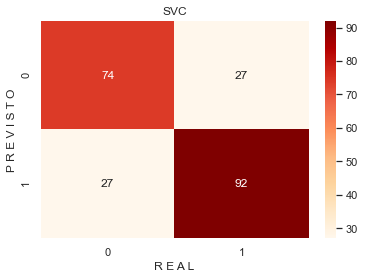

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC   
from sklearn.metrics import (accuracy_score, recall_score,classification_report,
                             cohen_kappa_score,f1_score, confusion_matrix,roc_auc_score,roc_curve)
from sklearn.preprocessing import LabelEncoder

#Binary format, with B=0 and M=1
#y = y.replace("B", 0)
#y = y.replace("M", 1)

# Para obter as classes como inteiros, utilizamos
# a classe LabelEncoder da scikit-learn

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(data_normal, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
svc = SVC(random_state=42)
svc.fit(x_train,y_train)
previsao = svc.predict(x_test)
recall = recall_score(y_test,previsao)
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,previsao)
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,previsao)
print('F1 score is: ', f1)
svc_curva_roc = roc_auc_score(y_test,previsao)
print('Curva Roc é:',svc_curva_roc)

#cm = confusion_matrix(y_test,clf_rf.predict(x_test))
#ax = sns.heatmap(cm,annot=True,fmt="d")

sns.heatmap(confusion_matrix(y_test, svc.predict(x_test)), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()


In [59]:
print(classification_report(y_test, previsao))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       101
           1       0.77      0.77      0.77       119

    accuracy                           0.75       220
   macro avg       0.75      0.75      0.75       220
weighted avg       0.75      0.75      0.75       220



### Predizer apenas uma pessoa

In [60]:
#lista = []
svc_previsoes = svc.predict(x_test[:10])
svc_previsoes

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [49]:
#Tranformar em True/False
previsoes = (svc_previsoes > 0)
previsoes

array([ True, False, False, False, False, False,  True,  True, False,
       False])

### HiperParâmetros 

https://www.kaggle.com/code/viznrvn/optimal-parameters-for-svc-using-gridsearch/notebook

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameters = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),parameters,refit = True, verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, 

[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.6s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   1.1s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.6s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.9s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   0.8s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   0.6s
[CV] END .................C=100, gamma=0.0001, kernel=linear; total time=   1.1s
[CV] END .................C=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

Recall is:  0.7647058823529411
Accuracy is:  0.7727272727272727
F1 score is:  0.7844827586206896
Curva Roc é: 0.7734420500873617


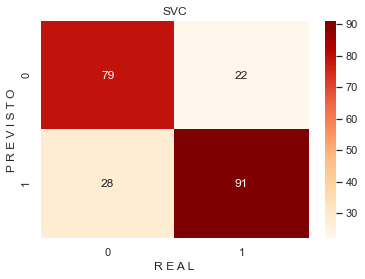

In [63]:
previsao = grid.predict(x_test);
recall = recall_score(y_test,previsao)
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,previsao)
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,previsao)
print('F1 score is: ', f1)
svc_curva_roc = roc_auc_score(y_test,previsao)
print('Curva Roc é:',svc_curva_roc)

#cm = confusion_matrix(y_test,clf_rf.predict(x_test))
#ax = sns.heatmap(cm,annot=True,fmt="d")

sns.heatmap(confusion_matrix(y_test, previsao), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [53]:
print(classification_report(y_test, grid.predict(x_test)))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       101
           1       0.81      0.76      0.78       119

    accuracy                           0.77       220
   macro avg       0.77      0.77      0.77       220
weighted avg       0.77      0.77      0.77       220



### Curva ROC

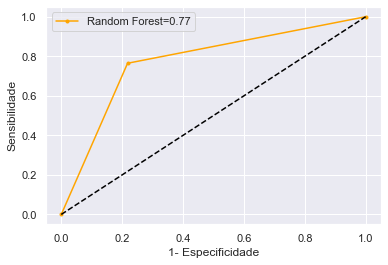

In [64]:
svc_fp,svc_vp,lim1 = roc_curve(y_test,previsao)
plt.plot(svc_fp,svc_vp, marker='.', label='Random Forest='+str(round(svc_curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")